Enter your choice (Rock/Paper/Scissors) or 'I quit' to end:  Rock


Player chose: Rock
Computer chose: Scissors
You Win


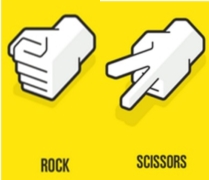

Enter your choice (Rock/Paper/Scissors) or 'I quit' to end:  Paper


Player chose: Paper
Computer chose: Paper
Game Tied


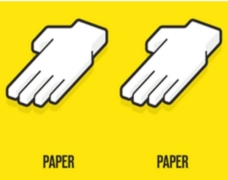

Enter your choice (Rock/Paper/Scissors) or 'I quit' to end:  Scissors


Player chose: Scissors
Computer chose: Paper
You Win


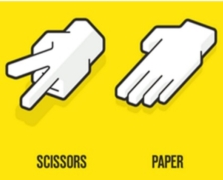

Enter your choice (Rock/Paper/Scissors) or 'I quit' to end:  I quit


Thank you for playing!


In [3]:
import random
from PIL import Image, ImageOps
from IPython.display import display

class RockPaperScissorsGame:
    def __init__(self):
        self.choices = ["Rock", "Paper", "Scissors"]
        self.images = {
            "Rock": "rock.jpg",
            "Paper": "paper.jpg",
            "Scissors": "scissors.jpg"
        }

    def get_player_choice(self):
        # In Jupyter, you can input your choice manually
        player_choice = input("Enter your choice (Rock/Paper/Scissors) or 'I quit' to end: ").capitalize()
        while player_choice not in self.choices and player_choice != "I quit":
            print("Invalid choice. Please enter Rock, Paper, Scissors, or 'I quit'.")
            player_choice = input("Enter your choice (Rock/Paper/Scissors) or 'I quit' to end: ").capitalize()
        return player_choice

    def determine_winner(self, player_choice, computer_choice):
        if player_choice == computer_choice:
            return "Game Tied"
        elif (
            (player_choice == "Rock" and computer_choice == "Paper") or
            (player_choice == "Scissors" and computer_choice == "Rock") or
            (player_choice == "Paper" and computer_choice == "Scissors")
        ):
            return "You Lose"
        else:
            return "You Win"

    def play_game(self):
        while True:
            player_choice = self.get_player_choice()

            if player_choice == "I quit":
                print("Thank you for playing!")
                break

            computer_choice = random.choice(self.choices)
            result = self.determine_winner(player_choice, computer_choice)

            print(f"Player chose: {player_choice}")
            print(f"Computer chose: {computer_choice}")
            print(result)

            # Display images horizontally
            player_image = Image.open(self.images[player_choice])
            computer_image = Image.open(self.images[computer_choice])

            # Ensure both images have the same height
            min_height = min(player_image.height, computer_image.height)
            player_image = ImageOps.fit(player_image, (player_image.width, min_height))
            computer_image = ImageOps.fit(computer_image, (computer_image.width, min_height))

            # Concatenate images horizontally
            images_concatenated = Image.new("RGB", (player_image.width + computer_image.width, min_height))
            images_concatenated.paste(player_image, (0, 0))
            images_concatenated.paste(computer_image, (player_image.width, 0))

            display(images_concatenated)

# Example
if __name__ == "__main__":
    game = RockPaperScissorsGame()
    game.play_game()
